In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import celerite as ce
import emcee as mc
import QPP_Funcs as qpp
import corner
from celerite.modeling import Model
from scipy.optimize import minimize, curve_fit

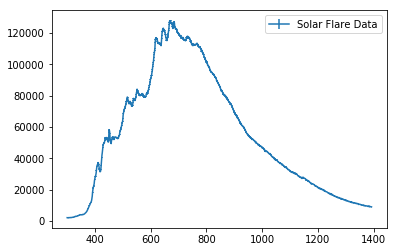

In [2]:
#opening data
data1 = "/Users/chris/Documents/QPP/SolarFlareGPs/data/120704187_ctime_lc.txt"
t, I = np.loadtxt(data1, unpack=True)
Ierr = np.sqrt(I)

plt.errorbar(t, I, yerr=Ierr, label = "Solar Flare Data")
plt.legend()
plt.show()

In [3]:
A_guess, t1_guess, t2_guess = qpp.initguess(t,I)
model = qpp.CTSModel_prior(log_A = np.log(A_guess), log_tau1 = np.log(t1_guess), log_tau2 = np.log(t2_guess))
kernel = qpp.SHOTerm_Prior(log_S0 = np.log(1e8), log_Q = np.log(1e2), log_omega0 = np.log(0.07)) #write guesser for kernel parameters
gp = ce.GP(kernel, mean=model, fit_mean=True)
gp.compute(t, Ierr)

In [4]:
soln = qpp.optimize_gp(gp, I)

Initial log-likelihood: -12630.9960192
Final log-likelihood: -8264.41459914
Optimized log-parameters: [ 28.76384487  -3.03180349  -4.38992952  11.75854318   6.15210447
   6.81159403]


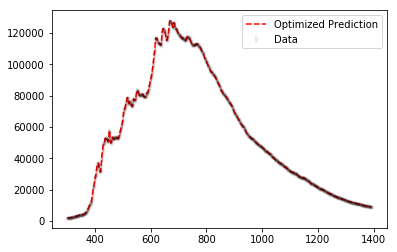

In [5]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln)
plt.show()

In [6]:
sampler = qpp.sample_gp(soln.x, I, gp, nsteps = 1500)

Burning in...


QPP_Funcs.py:55: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_S0*prob_Q*prob_omega0 * np.e)
QPP_Funcs.py:39: RuntimeWarning: divide by zero encountered in log
  return np.log(probA * probtau1 * probtau2 * np.e)


Sampling...


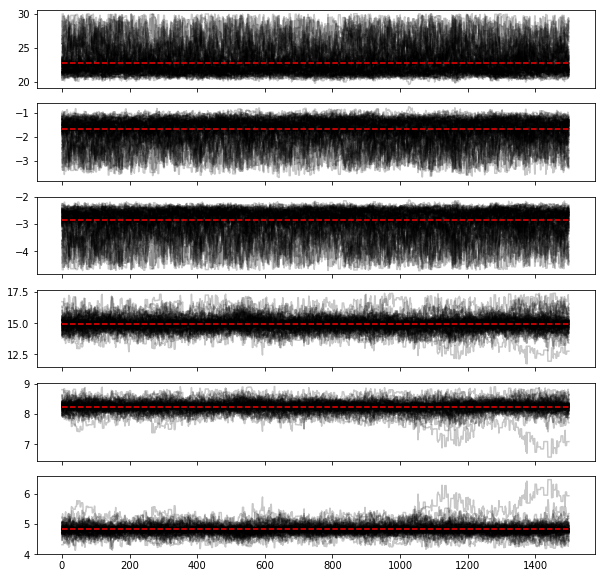

In [7]:
chain = sampler.chain
fig = qpp.plot_chain(chain)
plt.show()

#look into autocorrelation time
#chain should be significantly longer than autocorrelation time 



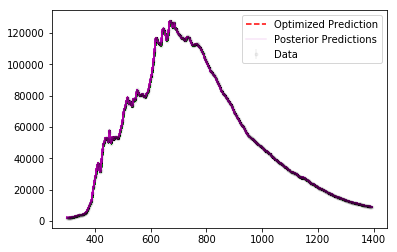

In [8]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln, chain=chain)
plt.show()

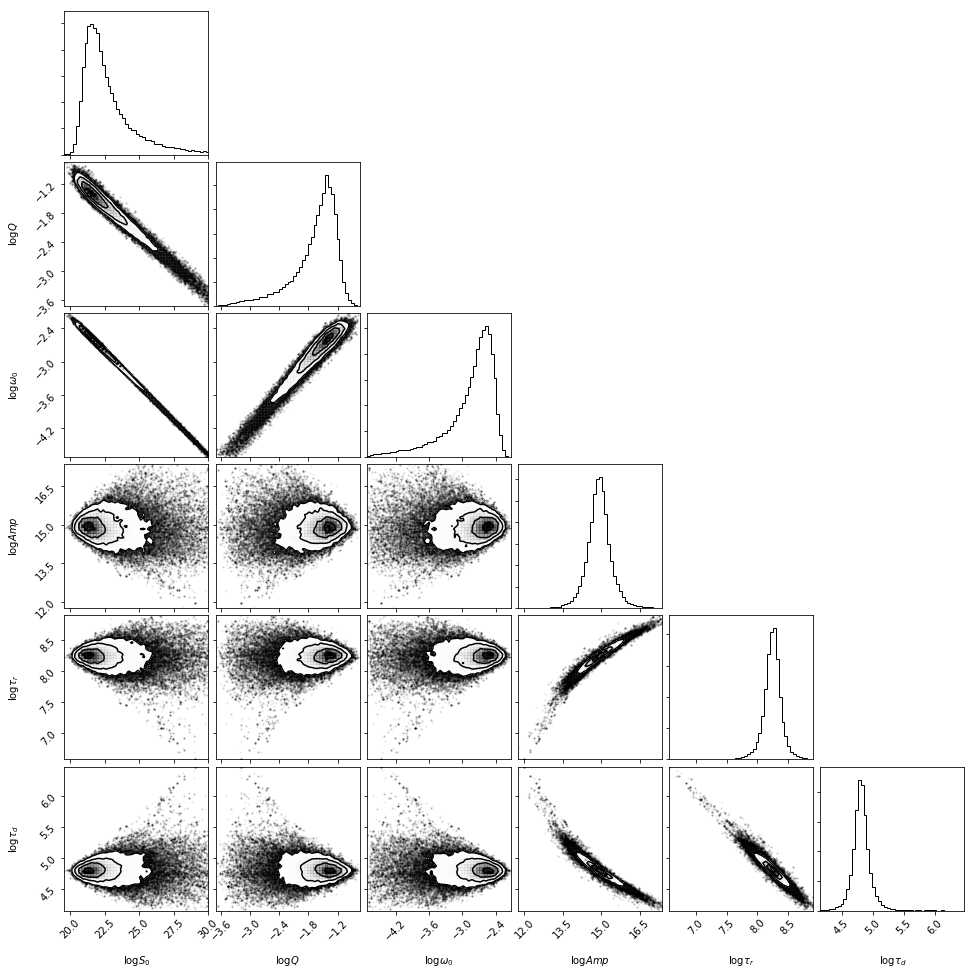

In [9]:
flat_samples = chain[:,200:, :].reshape((-1,6))
meanparams = np.mean(flat_samples, axis=0)
fig = corner.corner(flat_samples, bins=50, labels = [r"$\log{S_0}$", r"$\log{Q}$", r"$\log{\omega_0}$", r"$\log{Amp}$", r"$\log{\tau_r}$", r"$\log{\tau_d}$"],  range = [1,1,1,1,1,1])
plt.show()

In [10]:
print meanparams
print np.exp(meanparams)

[ 22.72641517  -1.67366546  -2.87090837  14.90899254   8.23744964
   4.8174639 ]
[  7.41236341e+09   1.87558317e-01   5.66474461e-02   2.98464849e+06
   3.77988792e+03   1.23651102e+02]


In [ ]:
sampler.run_mcmc(None, 5e5)